In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Spam Detection Project/Spam_Detection_Dataset_5572.csv', encoding='latin-1')

In [3]:
df.head(25)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.shape

(5572, 5)

In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.shape

(5572, 2)

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    text = ' '.join([word for word in tokens if word not in stop_words])
    text = re.sub(' +', ' ', text)
    return text
df['v2'] = df['v2'].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
df.head(10)

,v1,v2
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though
5,spam,freemsg hey darling 3 weeks word back id like ...
6,ham,even brother like speak treat like aids patent
7,ham,per request melle melle oru minnaminunginte nu...
8,spam,winner valued network customer selected receiv...
9,spam,mobile 11 months u r entitled update latest co...


In [12]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
num_duplicates = duplicate_rows.shape[0]
print(f"Number of duplicate rows: {num_duplicates}")

        v1                                                 v2
102    ham  per request melle melle oru minnaminunginte nu...
153    ham  per request melle melle oru minnaminunginte nu...
206    ham  entered cabin pa said happy bday boss felt spe...
222    ham                               sorry ill call later
325    ham                          callsmessagesmissed calls
...    ...                                                ...
5535   ham  know thinkin malaria relax children cant handl...
5539   ham                                sleepingand surfing
5547  spam  contract mobile 11 mnths latest motorola nokia...
5553   ham                               hahahause brain dear
5558   ham                               sorry ill call later

[457 rows x 2 columns]
Number of duplicate rows: 457


In [13]:
df.drop_duplicates(keep='first', inplace=True)

In [14]:
df.shape

(5115, 2)

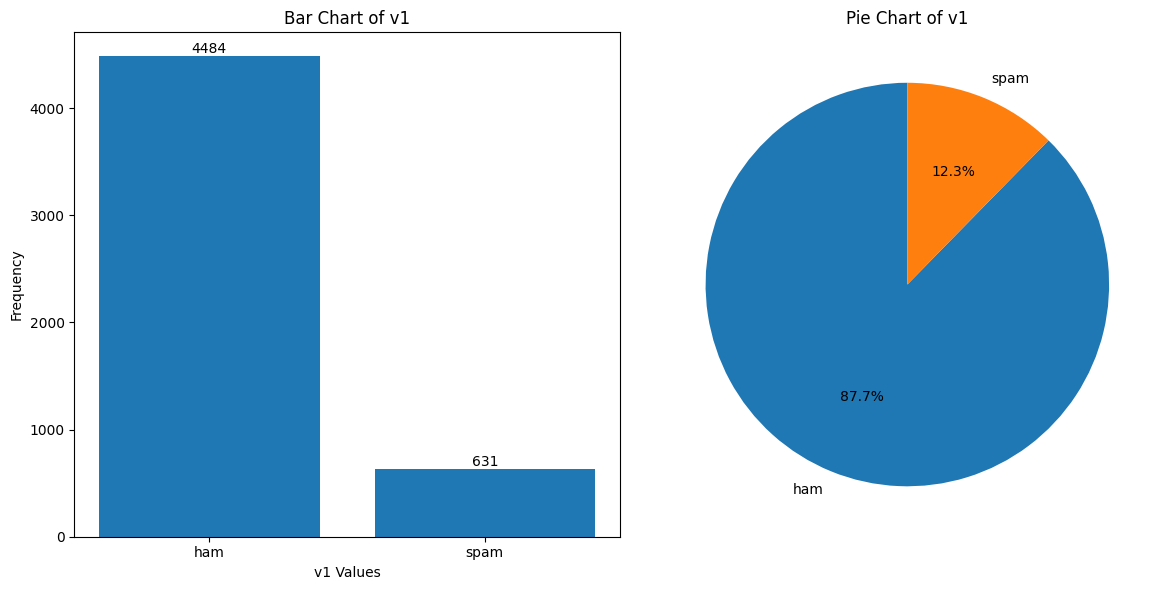

In [15]:
import matplotlib.pyplot as plt
v1_counts = df['v1'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
ax1.bar(v1_counts.index, v1_counts.values)
ax1.set_title('Bar Chart of v1')
ax1.set_xlabel('v1 Values')
ax1.set_ylabel('Frequency')
for i, v in enumerate(v1_counts.values):
    ax1.text(i, v + 5, str(v), ha='center', va='bottom')  # Adjust position as needed
ax2.pie(v1_counts, labels=v1_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Pie Chart of v1')
plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['v1_encoded'] = label_encoder.fit_transform(df['v1'])

In [21]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. Tokenize the text data
tokenizer = Tokenizer(num_words=10000)  # Consider adjusting num_words
tokenizer.fit_on_texts(df['v2'])
sequences = tokenizer.texts_to_sequences(df['v2'])

# 2. Pad the sequences
max_length = 100  # Consider adjusting max_length
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, df['v1_encoded'], test_size=0.2, random_state=42
)

# 4. Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 64, input_length=max_length),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 5. Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 6. Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8522 - loss: 0.3935 - val_accuracy: 0.9804 - val_loss: 0.0682
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9782 - loss: 0.0680 - val_accuracy: 0.9922 - val_loss: 0.0395
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9960 - loss: 0.0182 - val_accuracy: 0.9932 - val_loss: 0.0390
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9997 - loss: 0.0045 - val_accuracy: 0.9922 - val_loss: 0.0349
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9992 - loss: 0.0028 - val_accuracy: 0.9902 - val_loss: 0.0416
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.5323e-04 - val_accuracy: 0.9902 - val_loss: 0.0408
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.2263e-04 - val_accuracy: 0.9912 - val_loss: 0.0434
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.7473e-05 - val_accuracy: 

In [22]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.0706
Test Accuracy: 0.9902


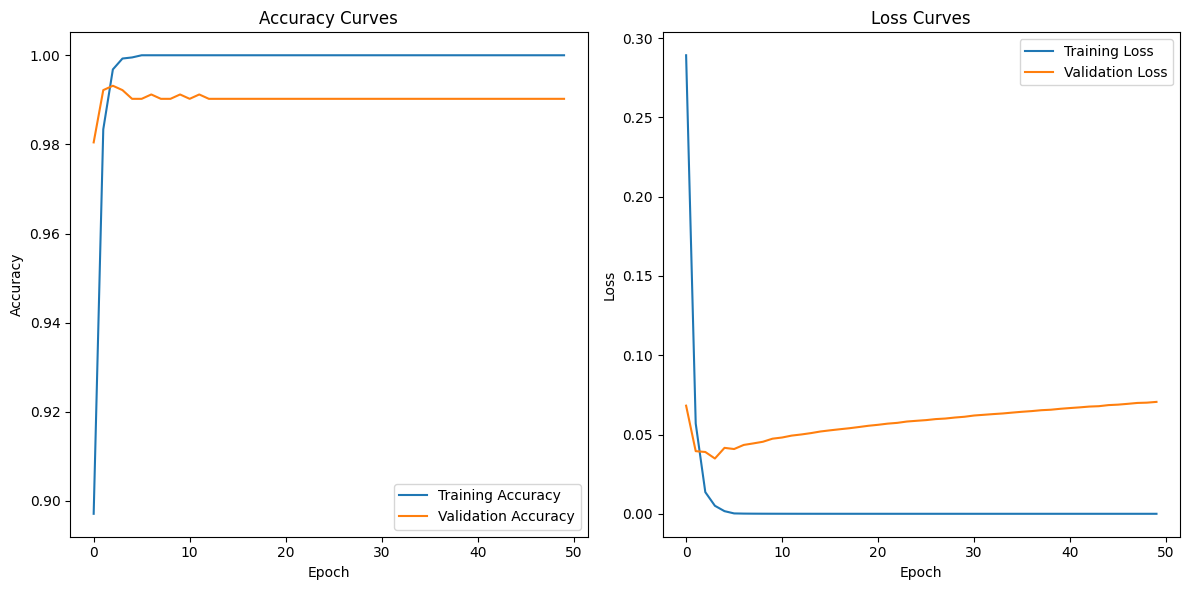

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


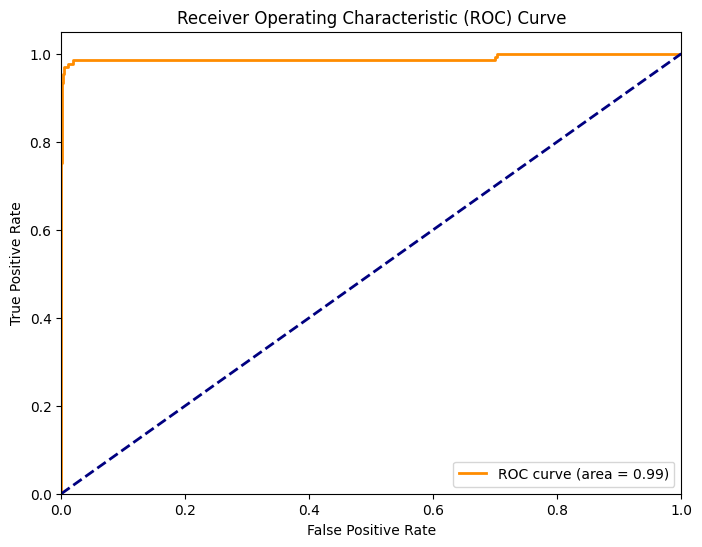

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred_probs = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


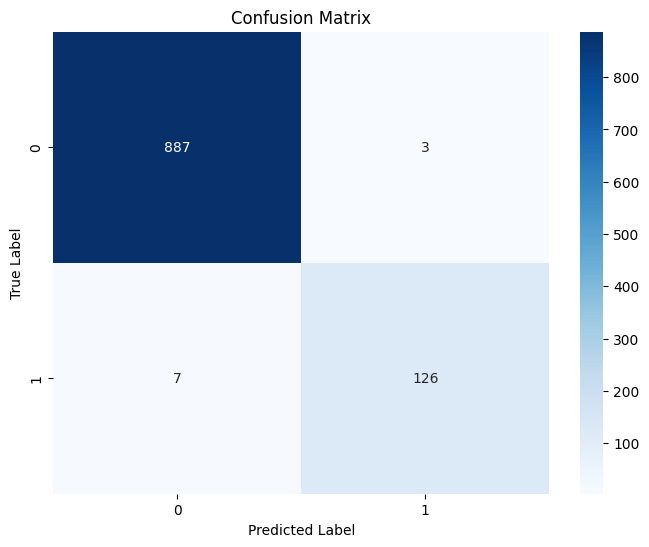

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Get predicted labels
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)  # Convert probabilities to labels (0 or 1)

# 2. Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# 3. Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()